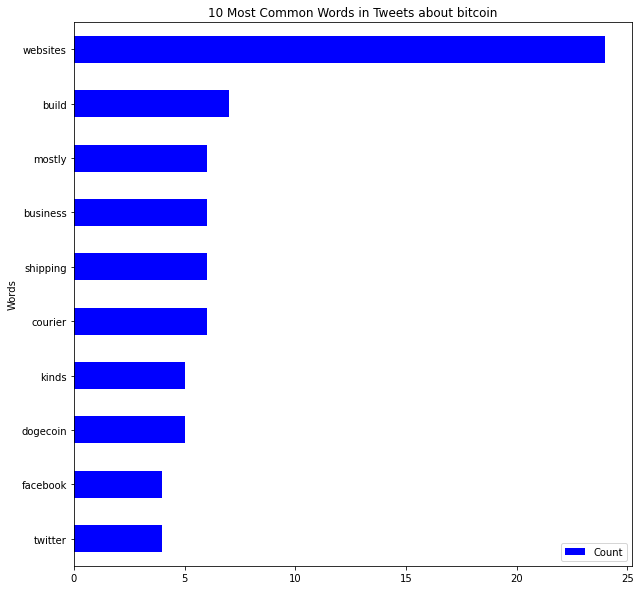

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.2544.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Josh\AppData\Local\Temp/ipykernel_13284/520003023.py", line 144, in sentiment
    tweets_url = [tweet.text for tweet in tweets]
  File "C:\Users\Josh\AppData\Local\Temp/ipykernel_13284/520003023.py", line 144, in <listcomp>
    tweets_url = [tweet.text for tweet in tweets]
  File "C:\Users\Josh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tweepy\cursor.py", line 86, in __next__
    return self.next()
  File "C:\Users\Josh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tweepy\cursor.py", line 286, in next
    self.current_page = next(self.page_iterator)
  File "C:\Users\Josh\AppDa

In [1]:
#Libraries that will be used
from tkinter import *
import tweepy as tw
#Regular Expression to clean up urls
import re
#Used to flatten lists
import itertools as it
#Used to count in a list as well as most common function
import collections
#Package to remove Stopwords from tweets
import nltk
from nltk.corpus import stopwords
#Package to track sentiment of words (-1 to 1 with 1 being most positive)
from textblob import TextBlob
#Used for data analysis and creating data frames
import pandas as pd
#Used to plot graphs
import matplotlib.pyplot as plt
#Used to create maps
import folium
#Used to stop from timeing out the request
from geopy.exc import GeocoderTimedOut
#Used to geocode lat/long to places
from geopy.geocoders import Nominatim
#Used to give access to default browse
import webbrowser
#Used to browse through user operating system
import os

#Acessing twitter API using credentials
consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_token_secret= 'XXX'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

#Begining of the Tkinter GUI
root = Tk()

#Title of the Window
root.title('Twitter Scraper')

#Size of the Window
root.geometry('300x300')

#Entry 1
label1 = Label(root, text='Search')
label1.pack()
Entry1 = Entry(root, bd = 5)
Entry1.pack()

#Entry 2
label2 = Label(root, text= 'How many tweets?')
label2.pack()
Entry2 = Entry(root, bd = 5)
Entry2.pack()


#Can add more entries like how many tweets to be used in the query (ex. more tweets = more data points)

#Defining functions that will be used to recall user input into the tweepy search query
def get_Entry1():
    return Entry1.get()

def get_Entry2():
    return Entry2.get()

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

#Defining functions that will be used to store tweets by username

#Download nltk stopwords
#nltk.download('stopwords')

#Define which stopwords are to be removed
stop_words = set(stopwords.words('english'))

def frequency():
    #can add more filters as needed
    get_Entry1()
    search_word = get_Entry1()

    get_Entry2()
    number_of_tweets = int(get_Entry2())

    #Query
    tweets = tw.Cursor(api.search_tweets, q= search_word + " -filter:retweets",
                                          lang= 'en').items(number_of_tweets)
    
    #results with URL
    tweets_url = [tweet.text for tweet in tweets]
    #results without URL
    tweets_no_url = [remove_url(tweet) for tweet in tweets_url]
    #results sepearated by words all lowercase
    words_in_tweet = [tweet.lower().split() for tweet in tweets_no_url]

    #removing stopwords from resulting tweets
    tweets_no_stopwords = [[word for word in tweet_words if not word in stop_words]
                            for tweet_words in words_in_tweet]

    #removing collection words from resulting tweets
    collection_words = search_word
    tweets_no_stopwords_no_collection_words = [[word for word in word if not word in collection_words]
                                                for word in tweets_no_stopwords]

    #Creates a list of words in the tweet and counts them
    words_no_url_stopwords = list(it.chain(*tweets_no_stopwords_no_collection_words))
    count_no_url_stopwords = collections.Counter(words_no_url_stopwords)
    
    #creates a pandas db in which it stores the words and the count of that words
    cleaned_tweets_no_url = pd.DataFrame(count_no_url_stopwords.most_common(10), columns = ['Words','Count'])
  
    #Plots a horizontal bargraph
    fig, ax = plt.subplots(figsize = (10,10))
    cleaned_tweets_no_url.sort_values(by = 'Count').plot.barh(x = 'Words',
                                                              y = 'Count',
                                                              ax = ax,
                                                              color = 'Blue')
    
    plt.title(f"10 Most Common Words in Tweets about {search_word}")

    plt.show()
   
    #Label(root, text= f'{count_no_url.most_common(10)}').pack()

def sentiment():
    #can add more filters as needed
    get_Entry1()
    search_word = get_Entry1()

    get_Entry2()
    number_of_tweets = int(get_Entry2())

    #Query
    tweets = tw.Cursor(api.search_tweets, q= search_word + " -filter:retweets",
                                          lang= 'en').items(number_of_tweets)
    
    #results with URL
    tweets_url = [tweet.text for tweet in tweets]
    #results without URL
    tweets_no_url = [remove_url(tweet) for tweet in tweets_url]

    #create list of TextBlob objects for grabbed tweets
    sentiment_obj =  [TextBlob(tweet) for tweet in tweets_no_url]
    #test case for sentiment 
    #sentiment_obj[0].polarity, sentiment_obj[0]

    #take sentiment value for every TextBlob tweet sentiment objects
    sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_obj]

    #Pandas DF storing sentiment polarity values with tweet content
    sentiment_df = pd.DataFrame(sentiment_values, columns = ["polarity", "tweet"])

    fig, ax = plt.subplots(figsize = (10,10))
    sentiment_df.hist(bins = [-1.00, -0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00],
                      ax = ax,
                      color = 'blue')
    plt.title(f"Sentiment from Tweets on {search_word}")
   
    plt.show()

def location():
    #can add more filters as needed
    get_Entry1()
    search_word = get_Entry1()

    get_Entry2()
    number_of_tweets = int(get_Entry2())

    def get_tweets():
        location_data = []
        for tweet in tw.Cursor(api.search_tweets, q=search_word).items(number_of_tweets):
            if hasattr(tweet, 'user') and hasattr(tweet.user, 'screen_name') and hasattr(tweet.user, 'location'):
                if tweet.user.location:
                    location_data.append((tweet.user.screen_name, tweet.user.location))
        return location_data
    
    def put_markers(map, data):
        geo_locator = Nominatim(user_agent="KEBJOSH")

        for (name, location) in data:
            if location:
                try:
                    location = geo_locator.geocode(location)
                except GeocoderTimedOut:
                    continue
                if location:
                    folium.Marker([location.latitude, location.longitude], popup=name).add_to(map)
    
    map_world = folium.Map(location=[0, 0], zoom_start=2)
    location_data = get_tweets()
    put_markers(map_world, location_data)
    map_world.save('index.html')
    filename = 'file:///'+os.getcwd()+'/'+'index.html'
    webbrowser.open_new_tab(filename)
                
#Pressing this button will execute the fucntions and return a string of tweets
Button(root, text = 'Word Frequency', command = frequency).pack()

#Button to execute tweet sentiment analysis
Button(root, text = 'Sentiment', command = sentiment).pack()

#Button to execute locatin and count
Button(root, text = 'Location', command = location).pack()

#End of GUI
root.mainloop()